# Support Vector Regression (SVR)

## STRATEGIC MANAGEMENT AND PROJECT PERFORMANCE STUDY

In [ ]:
#Study Topic
#INFLUENCE OF STRATEGIC MANAGEMENT ON PERFORMANCE OF HIV AND AIDS INTERVENTIONS MANAGED BY NON-GOVERNMENTAL ORGANISATIONS IN NYANZA REGION, KENYA

In [ ]:
#The study was guided by the following objectives: 
#1. To examine the influence of organisations purpose on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#2. To establish the influence of environmental scanning on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#3. To determine the influence of strategy formulation on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#4. To assess the influence of strategy implementation on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#5. To establish the influence of strategy evaluation and control on performance of HIV and AIDS interventions managed by non-governmental organisations in Nyanza Region. 
#6. To examine the moderating influence of stakeholder participation on the relationship between strategic management and performance of HIV and AIDS interventions managed by NGOs in Nyanza Region. 

In [ ]:
#Aim of the project
#To train a SVR to predict project performance based off the 5 independent and moderating variables.

In [21]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
#Importing the dataset

df = pd.read_csv('Strategic_Management.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [29]:
#Exploring the data
df.head()

,OrganizationsPurpose,EnvironmentalScanning,StrategyFormulation,StrategyImplementation,StrategyEvaluation,StakeholderParticipation,Project_Perfomance
0,21,23,29,35,28,21,26
1,19,25,24,35,24,19,24
2,21,26,29,38,33,27,29
3,21,26,29,34,29,24,27
4,21,30,24,35,29,24,27


In [30]:
#Exploring the data
df.describe()

,OrganizationsPurpose,EnvironmentalScanning,StrategyFormulation,StrategyImplementation,StrategyEvaluation,StakeholderParticipation,Project_Perfomance
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,20.78000,26.640000,28.560000,35.060000,29.880000,23.18000,27.340000
std,0.70826,2.663127,1.960425,3.542223,3.185682,3.92111,2.016362
min,19.00000,21.000000,24.000000,27.000000,24.000000,15.00000,23.000000
25%,21.00000,25.000000,28.000000,33.000000,28.000000,21.00000,26.000000
50%,21.00000,26.000000,29.000000,35.000000,29.000000,24.00000,27.500000
75%,21.00000,29.000000,30.000000,38.750000,32.000000,26.00000,29.000000
max,22.00000,30.000000,30.000000,40.000000,35.000000,30.00000,30.000000


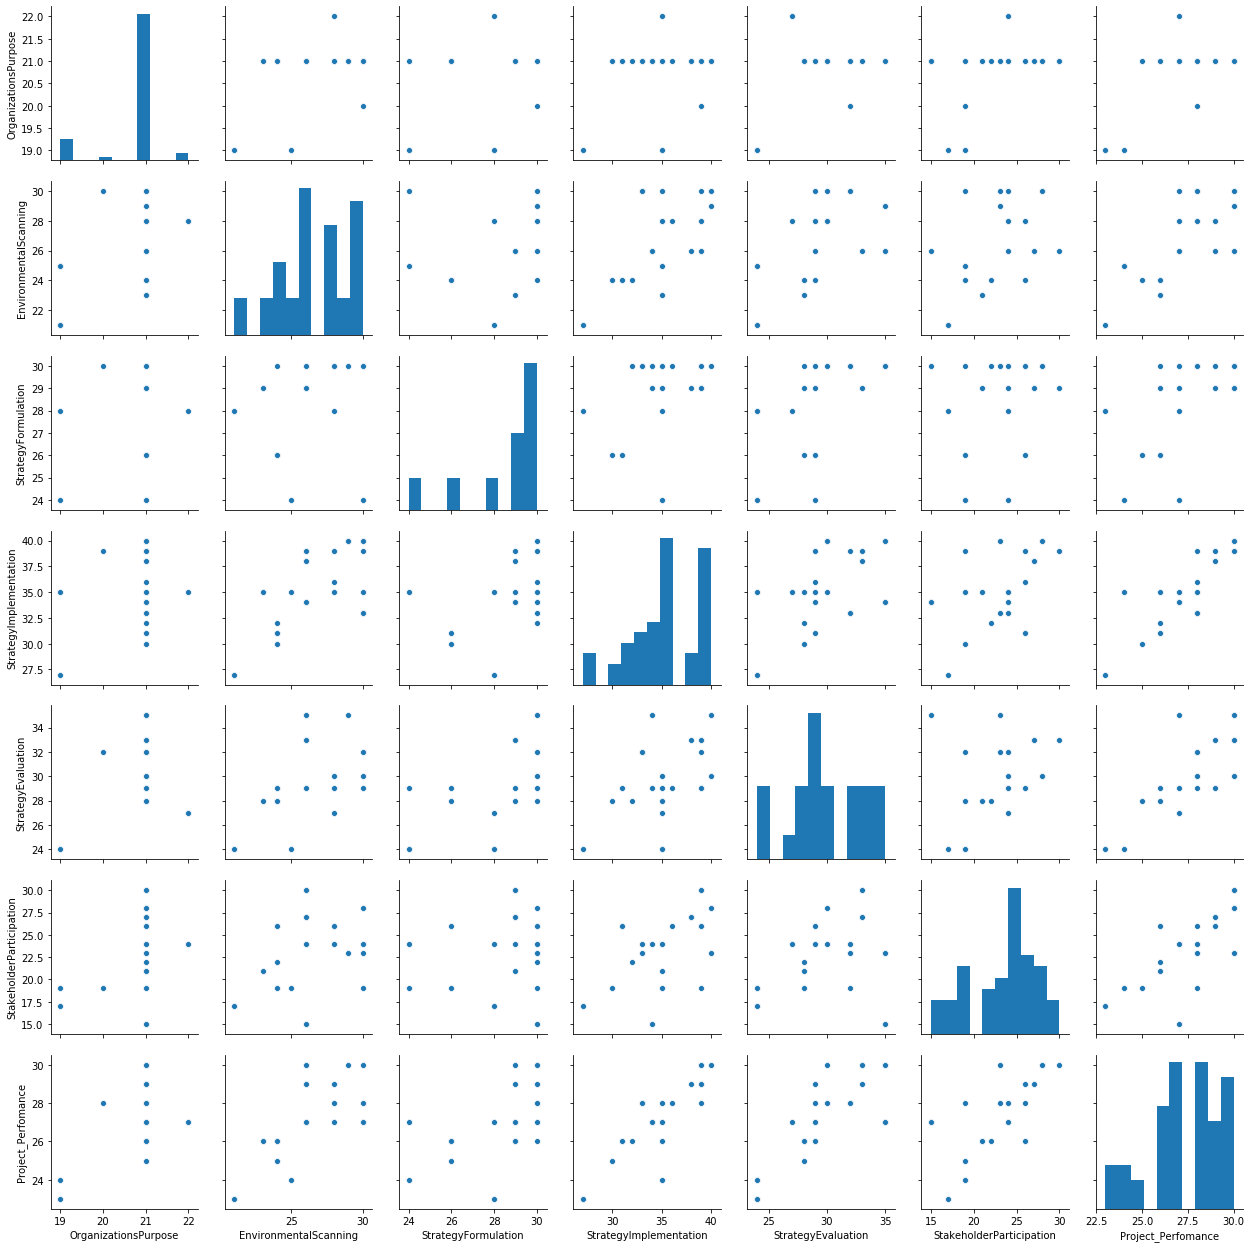

In [31]:
#Importing seaborn
import seaborn as sns
#Exploring the data through visualization
sns.pairplot(df)

In [23]:
y = y.reshape(len(y),1)

In [24]:
## Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [26]:
## Training the SVR model on the Training set

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
## Predicting the Test set results
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[26.04 26.  ]
 [29.04 29.  ]
 [25.91 26.  ]
 [26.04 26.  ]
 [29.39 29.  ]
 [25.21 25.  ]
 [26.82 27.  ]
 [26.87 27.  ]
 [29.39 29.  ]
 [26.79 27.  ]]


In [28]:
## Evaluating the Model Performance

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.975656306962691

In [ ]:
CONCLUSION:This model fitted this particular data better that simple linear regression.